In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Reading the data
df = pd.read_csv(r'C:\Users\HP\Downloads\movies.csv')

In [4]:
#looking at the data

df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [3]:
# Checking for any missing data
# looping through the data and seeing if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
# Handle missing values (example: filling with mean)
df.fillna(df.mean(), inplace=True)

# Check again
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [6]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [7]:
#Chnaging Data Type of the coloumn

df['budget'] = df['budget'].astype('int64')
df['budget'] = df['budget'].astype('int64')

In [8]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released     score         votes  \
0        June 13, 1980 (United States)  8.400000  9.270000e+05   
1         July 2, 1980 (United States)  5.800000  6.500000e+04   
2        June 20, 1980 (United States)  8.700000  1.200000e+06   
3         July 2, 1980 (United States)  7.700000  2.210000e+05   
4        July 25, 1980 (United States)  7.300000  1.080000e+05   
...                                ...       ...           ...   
7663  October 23, 2020 (United States)  3.100000  1.800000e+01   
7664  February 7, 2020 (United States)  4.700000  3.600000e+01   
7665         April 27, 2020 (Cameroon)  5.700000  2.900000e+01   
7666   October 1, 2020 (United States)  6.390411  8.810850e+04   
7667   August 19, 2020 (United States)  5.700000  7.000000e+00   

             director                   writer              star  \
0     Stanley Kubrick             Stephen King    Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole    Brooke Shields   
2      Irvin Kershner           Leigh Brackett       Mark Hamill   
3        Jim Abrahams             Jim Abrahams       Robert Hays   
4        Harold Ramis       Brian Doyle-Murray       Chevy Chase   
...               ...                      ...               ...   
7663    Joseph Ebanks            Joseph Ebanks      Shannon Bond   
7664     Dusty Dukatz              Lisa Huston  Michael Saquella   
7665     Nkanya Nkwai             Lynno Lovert      Onyama Laura   
7666    James Randall            James Randall     Christina Roz   
7667     Pereko Mosia             Pereko Mosia  Siyabonga Mabaso   

             country    budget         gross                    company  \
0     United Kingdom  19000000  4.699877e+07               Warner Bros.   
1      United States   4500000  5.885311e+07          Columbia Pictures   
2      United States  18000000  5.383751e+08                  Lucasfilm   
3      United States   3500000  8.345354e+07         Paramount Pictures   
4      United States   6000000  3.984634e+07             Orion Pictures   
...              ...       ...           ...                        ...   
7663   United States      7000  7.850054e+07                        NaN   
7664   United States  35589876  7.850054e+07  Cactus Blue Entertainment   
7665   United States     58750  7.850054e+07           Embi Productions   
7666   United States     15000  7.850054e+07                        NaN   
7667    South Africa  35589876  7.850054e+07                PK 65 Films   

         runtime  
0     146.000000  
1     104.000000  
2     124.000000  
3      88.000000  
4      98.000000  
...          ...  
7663   90.000000  
7664   90.000000  
7665  107.261613  
7666  120.000000  
7667  102.000000  

[7668 rows x 15 columns]

In [16]:
#Crreating correct year column


import re


def extract_year(date_str):
  """Extracts the year from a date string (handles different formats)."""
  if pd.isna(date_str):  # Check for missing values first
      return None
  try:
      # Try different patterns for more flexibility
      year_match = re.search(r'\d{4}', date_str)  # Look for 4 digits
      if not year_match:
          year_match = re.search(r'\d{2}-\d{2}-\d{4}', date_str)  # YYYY-MM-DD format
      if year_match:
          return year_match.group()
      else:
          return None  # Handle cases where no year is found
  except:
      # Handle potential exceptions (e.g., invalid date formats)
      return None

df['yearcorrect'] = df['released'].apply(extract_year)

df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released     score         votes  \
0        June 13, 1980 (United States)  8.400000  9.270000e+05   
1         July 2, 1980 (United States)  5.800000  6.500000e+04   
2        June 20, 1980 (United States)  8.700000  1.200000e+06   
3         July 2, 1980 (United States)  7.700000  2.210000e+05   
4        July 25, 1980 (United States)  7.300000  1.080000e+05   
...                                ...       ...           ...   
7663  October 23, 2020 (United States)  3.100000  1.800000e+01   
7664  February 7, 2020 (United States)  4.700000  3.600000e+01   
7665         April 27, 2020 (Cameroon)  5.700000  2.900000e+01   
7666   October 1, 2020 (United States)  6.390411  8.810850e+04   
7667   August 19, 2020 (United States)  5.700000  7.000000e+00   

             director                   writer              star  \
0     Stanley Kubrick             Stephen King    Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole    Brooke Shields   
2      Irvin Kershner           Leigh Brackett       Mark Hamill   
3        Jim Abrahams             Jim Abrahams       Robert Hays   
4        Harold Ramis       Brian Doyle-Murray       Chevy Chase   
...               ...                      ...               ...   
7663    Joseph Ebanks            Joseph Ebanks      Shannon Bond   
7664     Dusty Dukatz              Lisa Huston  Michael Saquella   
7665     Nkanya Nkwai             Lynno Lovert      Onyama Laura   
7666    James Randall            James Randall     Christina Roz   
7667     Pereko Mosia             Pereko Mosia  Siyabonga Mabaso   

             country    budget         gross                    company  \
0     United Kingdom  19000000  4.699877e+07               Warner Bros.   
1      United States   4500000  5.885311e+07          Columbia Pictures   
2      United States  18000000  5.383751e+08                  Lucasfilm   
3      United States   3500000  8.345354e+07         Paramount Pictures   
4      United States   6000000  3.984634e+07             Orion Pictures   
...              ...       ...           ...                        ...   
7663   United States      7000  7.850054e+07                        NaN   
7664   United States  35589876  7.850054e+07  Cactus Blue Entertainment   
7665   United States     58750  7.850054e+07           Embi Productions   
7666   United States     15000  7.850054e+07                        NaN   
7667    South Africa  35589876  7.850054e+07                PK 65 Films   

         runtime yearcorrect  
0     146.000000        1980  
1     104.000000        1980  
2     124.000000        1980  
3      88.000000        1980  
4      98.000000        1980  
...          ...         ...  
7663   90.000000        2020  
7664   90.000000        2020  
7665  107.261613        2020  
7666  120.000000        2020  
7667  102.000000        2020  

[7668 rows x 16 columns]

In [22]:
#Sorting the data by highest gross

df =df.sort_values(by=['gross'],inplace=False,ascending=False)

In [19]:
#In the above output we are getting only limited data, so , now the below code will help us get all the data i.e the entire table in the output.

pd.set_option('display.max_rows',None)

In [20]:
#Sorting the data by highest gross(running again to see the full dataset)

df.sort_values(by=['gross'],inplace=False,ascending=False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

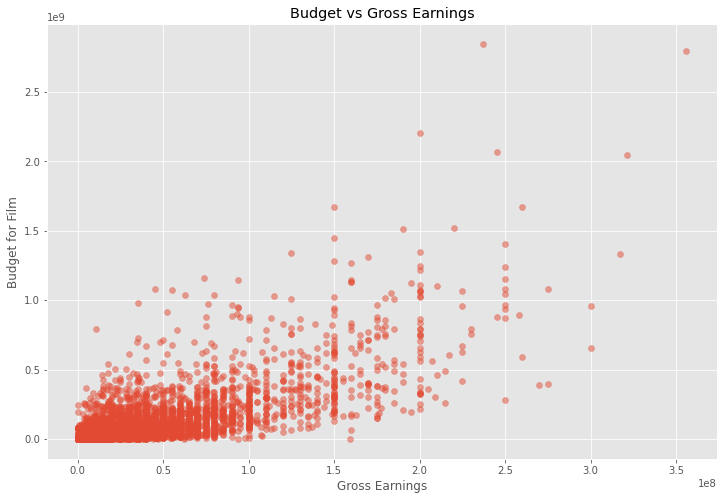

In [21]:
#Assumtion: Budget is gonna  have a high correlation
#Assuming Company might have high correlation.

#So to test this assumption we are goning to quickly do a scatter plot between budget and gross.

plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [23]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

             gross                company  runtime yearcorrect  
5445  2.847246e+09  Twentieth Century Fox    162.0        2009  
7445  2.797501e+09         Marvel Studios    181.0        2019  
3045  2.201647e+09  Twentieth Century Fox    194.0        1997  
6663  2.069522e+09              Lucasfilm    138.0        2015  
7244  2.048360e+09         Marvel Studios    149.0        2018

<AxesSubplot:xlabel='budget', ylabel='gross'>

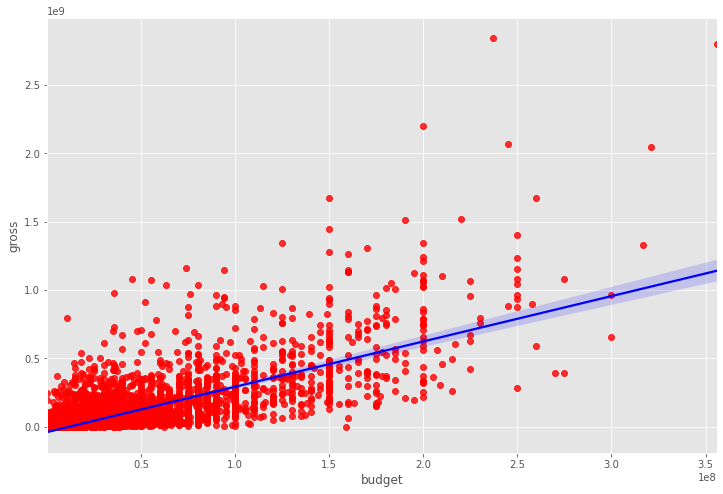

In [25]:
#Ploting buget vs gross using seaborn and also specifying color for the dots and the line

sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [26]:
#Now looking at correlations

In [27]:
df.corr()

#this syntax is only working between the numeric feild not with the field that has other datatype

#there are diffrent method of correlation like pearson, kendall and spearman. 
#If we don't specify the type then by default the pearson method is applied.
#lets see all of them

year     score     votes    budget     gross   runtime
year     1.000000  0.097936  0.222810  0.265578  0.252042  0.120766
score    0.097936  1.000000  0.409182  0.064541  0.182868  0.399329
votes    0.222810  0.409182  1.000000  0.421007  0.628713  0.309166
budget   0.265578  0.064541  0.421007  1.000000  0.711270  0.265287
gross    0.252042  0.182868  0.628713  0.711270  1.000000  0.241335
runtime  0.120766  0.399329  0.309166  0.265287  0.241335  1.000000

In [28]:
df.corr(method='kendall')

year     score     votes    budget     gross   runtime
year     1.000000  0.067518  0.331581  0.144258  0.182415  0.097271
score    0.067518  1.000000  0.300035  0.003606  0.080332  0.283303
votes    0.331581  0.300035  1.000000  0.161337  0.508040  0.198199
budget   0.144258  0.003606  0.161337  1.000000  0.258476  0.161710
gross    0.182415  0.080332  0.508040  0.258476  1.000000  0.156135
runtime  0.097271  0.283303  0.198199  0.161710  0.156135  1.000000

In [29]:
df.corr(method='spearman')

year     score     votes    budget     gross   runtime
year     1.000000  0.098869  0.470008  0.202558  0.267101  0.143114
score    0.098869  1.000000  0.428026  0.004842  0.117961  0.399451
votes    0.470008  0.428026  1.000000  0.234535  0.688687  0.290105
budget   0.202558  0.004842  0.234535  1.000000  0.361668  0.227859
gross    0.267101  0.117961  0.688687  0.361668  1.000000  0.227986
runtime  0.143114  0.399451  0.290105  0.227859  0.227986  1.000000

In [30]:
df.corr(method='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.097936  0.222810  0.265578  0.252042  0.120766
score    0.097936  1.000000  0.409182  0.064541  0.182868  0.399329
votes    0.222810  0.409182  1.000000  0.421007  0.628713  0.309166
budget   0.265578  0.064541  0.421007  1.000000  0.711270  0.265287
gross    0.252042  0.182868  0.628713  0.711270  1.000000  0.241335
runtime  0.120766  0.399329  0.309166  0.265287  0.241335  1.000000

In [31]:
#The assumption was corret high correlation between budget and gross

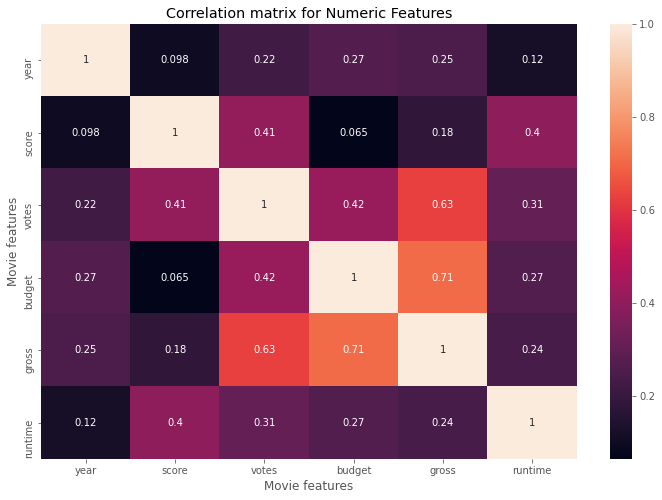

In [32]:
#looking at the visualzation for the correlation.

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [33]:
#Looking at the company field our 2nd assumtion.

df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

             gross                company  runtime yearcorrect  
5445  2.847246e+09  Twentieth Century Fox    162.0        2009  
7445  2.797501e+09         Marvel Studios    181.0        2019  
3045  2.201647e+09  Twentieth Century Fox    194.0        1997  
6663  2.069522e+09              Lucasfilm    138.0        2015  
7244  2.048360e+09         Marvel Studios    149.0        2018

In [5]:
#as we can see above most of the feild like company are not numeric and to get the correlation of this field we need to numerize this field.
#in this run we will change/assign a numberic value/representation to tose data flied.

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
0     6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1     5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2     5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3      286       4      4  1980      1492    7.7   221000.0      1301    2000   
4     1027       6      4  1980      1543    7.3   108000.0      1054     521   
...    ...     ...    ...   ...       ...    ...        ...       ...     ...   
7663  3705      -1      6  2020      2964    3.1       18.0      1500    2289   
7664  1678      -1      4  2020      1107    4.7       36.0       774    2614   
7665  4717      -1      6  2020       193    5.7       29.0      2061    2683   
7666  2843      -1      6  2020      2817    NaN        NaN      1184    1824   
7667  5394      -1     10  2020       391    5.7        7.0      2165    3344   

      star  country      budget        gross  company  runtime  
0     1047       54  19000000.0   46998772.0     2319    146.0  
1      327       55   4500000.0   58853106.0      731    104.0  
2     1745       55  18000000.0  538375067.0     1540    124.0  
3     2246       55   3500000.0   83453539.0     1812     88.0  
4      410       55   6000000.0   39846344.0     1777     98.0  
...    ...      ...         ...          ...      ...      ...  
7663  2421       55      7000.0          NaN       -1     90.0  
7664  1886       55         NaN          NaN      539     90.0  
7665  2040       55     58750.0          NaN      941      NaN  
7666   450       55     15000.0          NaN       -1    120.0  
7667  2463       44         NaN          NaN     1787    102.0  

[7668 rows x 15 columns]

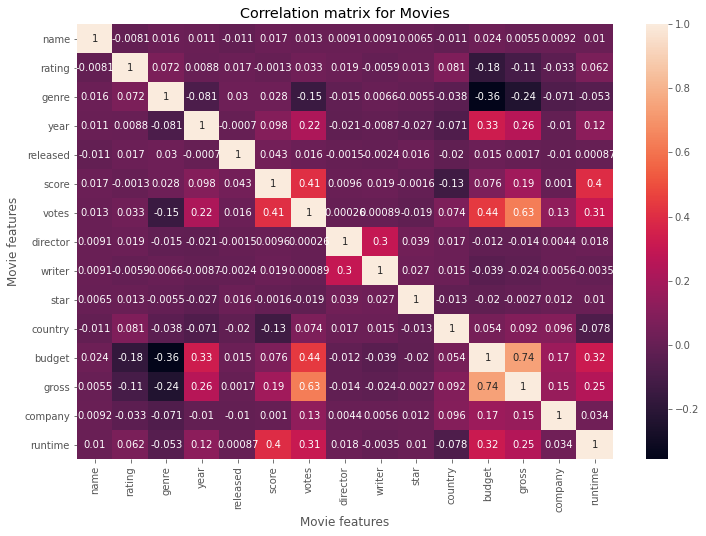

In [6]:
#Now lets see the correlation and visualtzation with the above hnages made.

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [7]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name      1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating   -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre     0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year      0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score     0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes     0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director  0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer    0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star      0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country  -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget    0.023970 -0.176002 -0.356564  0.329321  0.014683  0.076254   
gross     0.005533 -0.107339 -0.235650  0.257486  0.001659  0.186258   
company   0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime   0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   

             votes  director    writer      star   country    budget  \
name      0.013088  0.009079  0.009081  0.006472 -0.010737  0.023970   
rating    0.033225  0.019483 -0.005921  0.013405  0.081244 -0.176002   
genre    -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.356564   
year      0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.329321   
released  0.016097 -0.001478 -0.002404  0.015777 -0.020427  0.014683   
score     0.409182  0.009559  0.019416 -0.001609 -0.133348  0.076254   
votes     1.000000  0.000260  0.000892 -0.019282  0.073625  0.442429   
director  0.000260  1.000000  0.299067  0.039234  0.017490 -0.012272   
writer    0.000892  0.299067  1.000000  0.027245  0.015343 -0.039451   
star     -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.019589   
country   0.073625  0.017490  0.015343 -0.012998  1.000000  0.054063   
budget    0.442429 -0.012272 -0.039451 -0.019589  0.054063  1.000000   
gross     0.630757 -0.014441 -0.023519 -0.002717  0.092129  0.740395   
company   0.133204  0.004404  0.005646  0.012442  0.095548  0.173214   
runtime   0.309212  0.017624 -0.003511  0.010174 -0.078412  0.320447   

             gross   company   runtime  
name      0.005533  0.009211  0.010392  
rating   -0.107339 -0.032943  0.062145  
genre    -0.235650 -0.071067 -0.052711  
year      0.257486 -0.010431  0.120811  
released  0.001659 -0.010474  0.000868  
score     0.186258  0.001030  0.399451  
votes     0.630757  0.133204  0.309212  
director -0.014441  0.004404  0.017624  
writer   -0.023519  0.005646 -0.003511  
star     -0.002717  0.012442  0.010174  
country   0.092129  0.095548 -0.078412  
budget    0.740395  0.173214  0.320447  
gross     1.000000  0.154840  0.245216  
company   0.154840  1.000000  0.034402  
runtime   0.245216  0.034402  1.000000

In [10]:
#Now we aare going to do unstacking

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

#here in the output if you see all the things are compared to one value. example mane filed is compared with all the other filed similarly runtime is compared with all etc,, etc.

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078412
         budget      0.320447
         gross       0.245216
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64

In [11]:
#now lets pair this . what this will do is give the matrix but in a linear way.

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget   genre     -0.356564
genre    budget    -0.356564
         gross     -0.235650
gross    genre     -0.235650
rating   budget    -0.176002
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [12]:
#geeting values which has high correlation.

high_corr = sorted_pairs[(sorted_pairs)>0.5]

high_corr

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#Votes and buget have highest correlation to gross earnings.